In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dirname = '../rawdata/electric'
files = os.listdir(dirname)
files.sort()
dfarr = []
for filename in files:
    filepath = os.path.join(dirname, filename)
    print(filepath)
    df = pd.read_csv(filepath, encoding='cp949')
    df.columns = ['Date', 'Supply', 'Demand', 'Max', 'Spare', 'Spare%', 'RealSpare', 'RealSpare%']
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M%S')
    df = df.set_index('Date')['Demand'].resample('1H').mean()
    dfarr.append(df)
df = pd.concat(dfarr)
df

../rawdata/electric\2018_1.csv
../rawdata/electric\2018_2.csv
../rawdata/electric\2018_3.csv
../rawdata/electric\2018_4.csv
../rawdata/electric\2019_1.csv
../rawdata/electric\2019_2.csv
../rawdata/electric\2019_3.csv
../rawdata/electric\2019_4.csv
../rawdata/electric\2020_1.csv
../rawdata/electric\2020_2.csv
../rawdata/electric\2020_3.csv
../rawdata/electric\2020_4.csv


Date
2018-01-01 00:00:00    59734.950000
2018-01-01 01:00:00    57278.675000
2018-01-01 02:00:00    56117.208333
2018-01-01 03:00:00    55512.900000
2018-01-01 04:00:00    55483.883333
                           ...     
2020-12-31 19:00:00    69099.441667
2020-12-31 20:00:00    67472.400000
2020-12-31 21:00:00    65303.733333
2020-12-31 22:00:00    64924.933333
2020-12-31 23:00:00    67458.400000
Freq: H, Name: Demand, Length: 26304, dtype: float64

In [3]:
df.loc[pd.isna(df)].index

DatetimeIndex(['2018-05-08 22:00:00', '2018-05-08 23:00:00'], dtype='datetime64[ns]', name='Date', freq='H')

In [4]:
df.dropna(inplace=True)

In [6]:
df = df / 5000

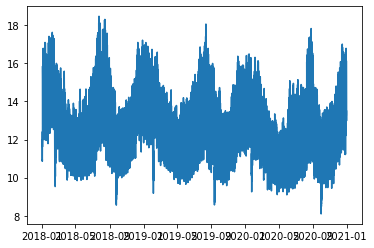

In [7]:
plt.plot(df)

In [8]:
df.isnull().any()

False

In [9]:
df.to_csv('../rawdata/electric.csv')